# Linear Regression

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df =pd.read_excel("Book2.xlsx")

In [7]:
df.head()

,Height (cm),Weight (kg)
0,150,50
1,152,52
2,155,54
3,157,56
4,160,58


In [14]:
# removig spaces in columns
df.columns = df.columns.str.strip()

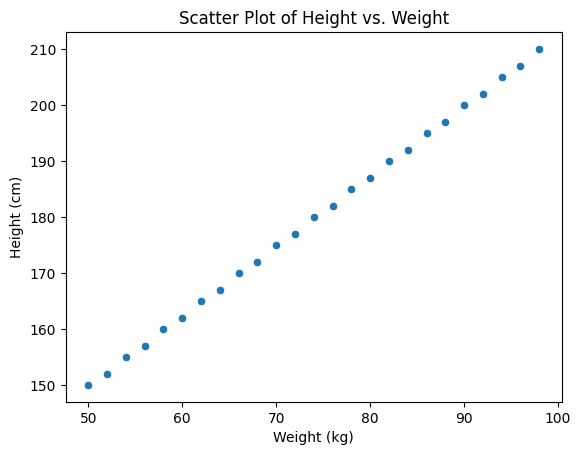

In [13]:
# we need to check whether the dependent and indepedet feature have corr relation
#Create a scatter plot
sns.scatterplot(x="Weight (kg)", y="Height (cm)", data=df)

# Add titles and labels for clarity
plt.title('Scatter Plot of Height vs. Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')

# Display the plot
plt.show()

In [15]:
df.corr()

,Height (cm),Weight (kg)
Height (cm),1.000000,0.999904
Weight (kg),0.999904,1.000000


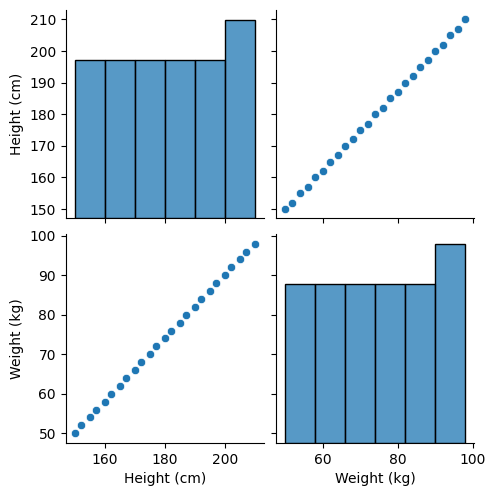

In [16]:
sns.pairplot(data = df)

In [17]:
# we get a strong feeling that yes there is a linear correlation so linear regression will work

In [18]:
# Independent and dependent features
df.head()

,Height (cm),Weight (kg)
0,150,50
1,152,52
2,155,54
3,157,56
4,160,58


In [23]:
x = df[["Weight (kg)"]] ## Always make sure that your independnet feature is in form of dataframe or 2 dimensional array
y = df["Height (cm)"] ## Always make sure it must be in series or 1 dimestioal

In [27]:
## Train Test Split (for overefitting and unerfitting condition amd etc)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 ,random_state = 42)

In [28]:
x_train.shape

(18, 1)

In [32]:
## Standaradization
from sklearn.preprocessing import StandardScaler

In [35]:
scaler  = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [36]:
x_test = scaler.transform(x_test)

In [37]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [38]:
regression =LinearRegression()

In [39]:
regression.fit(x_train, y_train)

LinearRegression()

In [46]:
print("Remeber the formula")
print("beta 1 is =",regression.coef_)
print("intercpt is beta 0 = ", regression.intercept_)

Remeber the formula
beta 1 is = [18.58750029]
intercpt is beta 0 =  180.33333333333334


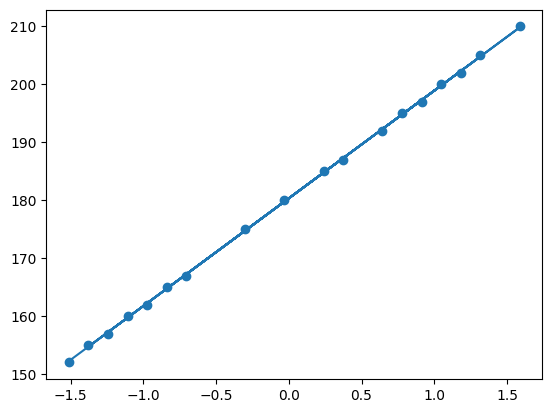

In [48]:
# plot training data best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

# Prediction o test data
1. Prediction height output = intercpet +coeff_(weights)
2. y_pred_test = 180.33 + 18.58(x_test)

In [49]:
# prediction for test data
y_pred =regression.predict(x_test)

In [52]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [53]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.0730846904508137
0.2679051889814202
0.2703418030028166


In [55]:
from sklearn.metrics import r2_score


In [56]:
score = r2_score(y_test , y_pred)
print(score)

0.9997286596581232


In [57]:
# ADJUSTED R SCORE
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9996743915897478

In [58]:
## OLS linear regression
import statsmodel.api as sm

ModuleNotFoundError: No module named 'statsmodel'

In [ ]:
model = sm.OLS(y_train,x_train).fit()

In [ ]:
prediction = model.predict(x_test)
prediction

In [ ]:
print(model.summary())

# PREDICTION FOR NEW DATA

In [62]:
## prediction for mew data
regression.predict(scaler.transform([[72]]))

array([177.27174888])